In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('flight_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1903 non-null   int64 
 1   Flight         1903 non-null   object
 2   DepartureTime  1903 non-null   object
 3   ArivalTime     1903 non-null   object
 4   source         1903 non-null   object
 5   Destination    1903 non-null   object
 6   Duration       1903 non-null   object
 7   Price_         1903 non-null   object
 8   Date           1903 non-null   object
dtypes: int64(1), object(8)
memory usage: 133.9+ KB


In [4]:
df['Date']= pd.to_datetime(df['Date'])

In [5]:
# taking out the information form the date of flight 

In [6]:
df['Date_year'] = df['Date'].dt.year

In [7]:
df['Date_month_no'] = df['Date'].dt.month

In [8]:
df['Date_day_no'] = df['Date'].dt.day

In [9]:
df['Day_of_week'] = df['Date'].dt.dayofweek

In [10]:
df['Date_dow_name'] = df['Date'].dt.day_name()

In [11]:
df['Date_is_weekend'] = np.where(df['Date_dow_name'].isin(['Sunday','Saturday']),1,0)
df.head(5)

,Unnamed: 0,Flight,DepartureTime,ArivalTime,source,Destination,Duration,Price_,Date,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_dow_name,Date_is_weekend
0,0,SpiceJet,06:20,09:10,New Delhi,Bengaluru,02 h 50 m\nNon stop,"₹ 5,234",2023-08-01,2023,8,1,1,Tuesday,0
1,1,AirAsia,08:10,10:55,New Delhi,Bengaluru,02 h 45 m\nNon stop,"₹ 5,235",2023-08-01,2023,8,1,1,Tuesday,0
2,2,IndiGo,07:55,10:55,New Delhi,Bengaluru,03 h\nNon stop,"₹ 4,537",2023-08-01,2023,8,1,1,Tuesday,0
3,3,IndiGo,04:20,07:15,New Delhi,Bengaluru,02 h 55 m\nNon stop,"₹ 5,237",2023-08-01,2023,8,1,1,Tuesday,0
4,4,IndiGo,05:55,08:45,New Delhi,Bengaluru,02 h 50 m\nNon stop,"₹ 5,237",2023-08-01,2023,8,1,1,Tuesday,0


In [12]:
# we extracted the year,day,month and in that is that a weekend day or not
# lets remove the Date column now
del(df['Date'])

In [13]:
del(df['Date_dow_name'])

In [14]:
s = []
for i in df['Price_']:
    a,b = i.split(" ",1)
    a,c = b.split(",",1)
    s.append(a+c)
print(s)

['5234', '5235', '4537', '5237', '5237', '5237', '5237', '5237', '5237', '5237', '5237', '5241', '5241', '5241', '5346', '5482', '5501', '5504', '5504', '5504', '5504', '5611', '5611', '5692', '5692', '5816', '5901', '6001', '6112', '6217', '6344', '6344', '6344', '6377', '6416', '6737', '7016', '7184', '7184', '7184', '7499', '7540', '7929', '8025', '8129', '9284', '9367', '12640', '15584', '21495', '4537', '5234', '5235', '5237', '5237', '5237', '5237', '5241', '5241', '5241', '5241', '5501', '5504', '5901', '5901', '6416', '6416', '6737', '7079', '7079', '7184', '7184', '7184', '7184', '7184', '7226', '8234', '8234', '8234', '9210', '9284', '9736', '9900', '9900', '10185', '10186', '10320', '10334', '10711', '11520', '11602', '11702', '12368', '12627', '12959', '14499', '14499', '15584', '16403', '21495', '5238', '5241', '4537', '5843', '6344', '6416', '6659', '6737', '7079', '7184', '7184', '7184', '7184', '7226', '7226', '7487', '7919', '7919', '7919', '8175', '8234', '8234', '823

In [15]:
df['Price'] = s

In [16]:
df['Price'] = df['Price'].astype(int)

In [17]:
del(df['Price_'])

In [18]:
df.head(5)

,Unnamed: 0,Flight,DepartureTime,ArivalTime,source,Destination,Duration,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_is_weekend,Price
0,0,SpiceJet,06:20,09:10,New Delhi,Bengaluru,02 h 50 m\nNon stop,2023,8,1,1,0,5234
1,1,AirAsia,08:10,10:55,New Delhi,Bengaluru,02 h 45 m\nNon stop,2023,8,1,1,0,5235
2,2,IndiGo,07:55,10:55,New Delhi,Bengaluru,03 h\nNon stop,2023,8,1,1,0,4537
3,3,IndiGo,04:20,07:15,New Delhi,Bengaluru,02 h 55 m\nNon stop,2023,8,1,1,0,5237
4,4,IndiGo,05:55,08:45,New Delhi,Bengaluru,02 h 50 m\nNon stop,2023,8,1,1,0,5237


In [19]:
# taking out information of duration and no of stops 

In [20]:
new = df["Duration"].str.split("\n", n = 1, expand = True)
st=[]
for i in new[1]:
    if(len(str(i))>10):
        a,b=i.split("via",1)
        st.append(b)
    else:
        st.append(i)
df1=pd.DataFrame(new[0])
df1.insert(1,"Via",st)
df1.rename(columns={0:"Duration"},inplace=True)
df1["Stops"]=[0 if(x=='Non stop') else len(str(x).split()) for x in df1["Via"]]
df1

,Duration,Via,Stops
0,02 h 50 m,Non stop,0
1,02 h 45 m,Non stop,0
2,03 h,Non stop,0
3,02 h 55 m,Non stop,0
4,02 h 50 m,Non stop,0
...,...,...,...
1898,03 h 05 m,Non stop,0
1899,03 h 25 m,Non stop,0
1900,04 h 50 m,Mumbai,1
1901,03 h 20 m,Non stop,0


In [21]:
df['Duration'] = df1['Duration']

In [22]:
df['No_of_stops'] = df1['Stops']

In [23]:
#df['DepartureTime']= pd.to_datetime(df['DepartureTime'])

In [24]:
d = []
for i in df['ArivalTime']:
    if(len(str(i))>5):
        a,b = i.split("\n",1)
        d.append(a)
    else:
        d.append(i)
print(d)

['09:10', '10:55', '10:55', '07:15', '08:45', '09:50', '12:05', '13:30', '15:05', '15:55', '00:10', '10:55', '10:45', '11:50', '17:05', '23:25', '08:35', '12:30', '16:25', '20:20', '00:05', '16:40', '23:05', '11:05', '00:35', '00:25', '00:40', '22:50', '22:05', '12:15', '08:20', '08:55', '22:40', '14:35', '01:45', '09:55', '19:20', '18:30', '22:40', '23:20', '20:05', '12:10', '20:45', '21:45', '13:55', '20:25', '15:10', '18:30', '18:50', '17:00', '10:55', '09:10', '10:55', '07:15', '08:45', '09:50', '12:10', '08:20', '08:55', '10:55', '12:30', '08:35', '10:45', '00:10', '00:40', '12:05', '13:30', '13:00', '15:05', '15:55', '11:50', '16:40', '17:00', '18:30', '20:15', '12:15', '16:25', '20:25', '12:20', '19:20', '18:50', '01:40', '18:30', '20:05', '22:10', '13:00', '00:35', '00:05', '00:25', '22:05', '23:05', '22:50', '21:45', '14:35', '22:40', '23:25', '01:45', '22:40', '15:10', '23:20', '09:55', '10:55', '10:55', '12:10', '08:20', '07:15', '08:40', '14:15', '09:50', '08:55', '10:45', 

In [25]:
df['ArivalTime'] = d
#df['ArivalTime'] = pd.to_datetime(df['ArivalTime'])

In [26]:
# now lets convert the duration in total minutes 
a = []
b = []
for i in df['Duration']:
        c,d = i.split("h",1)
        a.append(c)
        l=d.split(" ")
        if(len(l)>1):
            b.append(int(l[1]))
        else:
            b.append(0)
time =[]
for (i,j) in zip(a,b):
    time.append(int(i)*60+j)
print(time)       

[170, 165, 180, 175, 170, 170, 170, 170, 170, 170, 655, 175, 155, 165, 465, 175, 170, 165, 175, 200, 175, 160, 155, 190, 170, 185, 575, 160, 165, 165, 165, 165, 195, 165, 170, 480, 170, 175, 165, 160, 160, 300, 340, 160, 295, 175, 265, 170, 165, 170, 180, 170, 165, 175, 170, 170, 300, 165, 165, 175, 165, 170, 155, 655, 575, 170, 170, 290, 170, 170, 165, 160, 170, 175, 200, 165, 175, 175, 395, 170, 165, 310, 170, 160, 320, 340, 170, 175, 185, 165, 155, 160, 160, 165, 195, 175, 170, 165, 255, 160, 480, 175, 180, 300, 165, 175, 170, 355, 170, 165, 155, 200, 175, 165, 185, 325, 180, 170, 170, 380, 165, 195, 160, 390, 165, 365, 170, 165, 160, 175, 165, 165, 160, 255, 235, 160, 155, 170, 170, 175, 175, 165, 175, 170, 165, 170, 170, 170, 170, 770, 175, 170, 170, 290, 170, 170, 430, 180, 365, 165, 165, 155, 165, 345, 170, 355, 170, 165, 160, 325, 185, 155, 170, 175, 160, 175, 165, 195, 175, 165, 170, 165, 255, 170, 160, 165, 175, 175, 200, 170, 170, 170, 165, 170, 175, 655, 170, 165, 170, 170,

In [27]:
df['Duration'] = time

In [28]:
df.head()

,Unnamed: 0,Flight,DepartureTime,ArivalTime,source,Destination,Duration,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_is_weekend,Price,No_of_stops
0,0,SpiceJet,06:20,09:10,New Delhi,Bengaluru,170,2023,8,1,1,0,5234,0
1,1,AirAsia,08:10,10:55,New Delhi,Bengaluru,165,2023,8,1,1,0,5235,0
2,2,IndiGo,07:55,10:55,New Delhi,Bengaluru,180,2023,8,1,1,0,4537,0
3,3,IndiGo,04:20,07:15,New Delhi,Bengaluru,175,2023,8,1,1,0,5237,0
4,4,IndiGo,05:55,08:45,New Delhi,Bengaluru,170,2023,8,1,1,0,5237,0


In [29]:
df['source'].unique()

array(['New Delhi'], dtype=object)

In [30]:
df['source'] = 1

In [31]:
df['Destination'].unique()

array(['Bengaluru', 'Chennai', 'Kolkata', 'Mumbai', 'Hyderabad', 'Kochi'],
      dtype=object)

In [32]:
!pip install category_encoders

In [33]:
df.head()

,Unnamed: 0,Flight,DepartureTime,ArivalTime,source,Destination,Duration,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_is_weekend,Price,No_of_stops
0,0,SpiceJet,06:20,09:10,1,Bengaluru,170,2023,8,1,1,0,5234,0
1,1,AirAsia,08:10,10:55,1,Bengaluru,165,2023,8,1,1,0,5235,0
2,2,IndiGo,07:55,10:55,1,Bengaluru,180,2023,8,1,1,0,4537,0
3,3,IndiGo,04:20,07:15,1,Bengaluru,175,2023,8,1,1,0,5237,0
4,4,IndiGo,05:55,08:45,1,Bengaluru,170,2023,8,1,1,0,5237,0


In [34]:
# let's convert the destination column
df = pd.get_dummies(df,columns=['Destination'],drop_first = True)

In [35]:
df['Flight'].unique()

array(['SpiceJet', 'AirAsia', 'IndiGo', 'Air India', 'Vistara',
       'Go First', 'Akasa Air', 'Air India, AirAsia', 'Vistara, IndiGo',
       'Air India, Akasa Air', 'IndiGo, AirAsia', 'Vistara, Akasa Air',
       'SpiceJet, Go First', 'SpiceJet, Akasa Air', 'Air India, IndiGo',
       'IndiGo, Akasa Air', 'IndiGo, Air India', 'Go First, Akasa Air',
       'AirAsia, Akasa Air', 'SpiceJet, Air India', 'AirAsia, IndiGo',
       'Alliance Air, IndiGo', 'SpiceJet, IndiGo',
       'Air India, Alliance Air', 'IndiGo, Go First',
       'SpiceJet, Alliance Air', 'AirAsia, Alliance Air',
       'IndiGo, Alliance Air', 'Go First, AirAsia', 'AirAsia, Go First',
       'Vistara, AirAsia', 'Akasa Air, Alliance Air',
       'Akasa Air, Go First', 'SpiceJet, AirAsia'], dtype=object)

In [36]:
del(df['Unnamed: 0'])

In [37]:
from category_encoders import BinaryEncoder
bin_enc = BinaryEncoder(cols = ['Flight'])
a = bin_enc.fit_transform(df['Flight'])

In [38]:
df = pd.concat([df,a],axis = 1)

In [39]:
df.head()

,Flight,DepartureTime,ArivalTime,source,Duration,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_is_weekend,...,Destination_Hyderabad,Destination_Kochi,Destination_Kolkata,Destination_Mumbai,Flight_0,Flight_1,Flight_2,Flight_3,Flight_4,Flight_5
0,SpiceJet,06:20,09:10,1,170,2023,8,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,AirAsia,08:10,10:55,1,165,2023,8,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2,IndiGo,07:55,10:55,1,180,2023,8,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,IndiGo,04:20,07:15,1,175,2023,8,1,1,0,...,0,0,0,0,0,0,0,0,1,1
4,IndiGo,05:55,08:45,1,170,2023,8,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [40]:
del(df['Flight'])

In [41]:
from datetime import datetime

for i,j in zip(df['DepartureTime'],df['ArivalTime']):
    D_time = datetime.strptime(i, '%H:%M').time()
    A_time = datetime.strptime(j, '%H:%M').time()
    print(D_time,A_time)
df['DeparturTime'] = D_time
df['ArivalTime'] = A_time

06:20:00 09:10:00
08:10:00 10:55:00
07:55:00 10:55:00
04:20:00 07:15:00
05:55:00 08:45:00
07:00:00 09:50:00
09:15:00 12:05:00
10:40:00 13:30:00
12:15:00 15:05:00
13:05:00 15:55:00
13:15:00 00:10:00
08:00:00 10:55:00
08:10:00 10:45:00
09:05:00 11:50:00
09:20:00 17:05:00
20:30:00 23:25:00
05:45:00 08:35:00
09:45:00 12:30:00
13:30:00 16:25:00
17:00:00 20:20:00
21:10:00 00:05:00
14:00:00 16:40:00
20:30:00 23:05:00
07:55:00 11:05:00
21:45:00 00:35:00
21:20:00 00:25:00
15:05:00 00:40:00
20:10:00 22:50:00
19:20:00 22:05:00
09:30:00 12:15:00
05:35:00 08:20:00
06:10:00 08:55:00
19:25:00 22:40:00
11:50:00 14:35:00
22:55:00 01:45:00
01:55:00 09:55:00
16:30:00 19:20:00
15:35:00 18:30:00
19:55:00 22:40:00
20:40:00 23:20:00
17:25:00 20:05:00
07:10:00 12:10:00
15:05:00 20:45:00
19:05:00 21:45:00
09:00:00 13:55:00
17:30:00 20:25:00
10:45:00 15:10:00
15:40:00 18:30:00
16:05:00 18:50:00
14:10:00 17:00:00
07:55:00 10:55:00
06:20:00 09:10:00
08:10:00 10:55:00
04:20:00 07:15:00
05:55:00 08:45:00
07:00:00 0

In [42]:
df.head()

,DepartureTime,ArivalTime,source,Duration,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_is_weekend,Price,...,Destination_Kochi,Destination_Kolkata,Destination_Mumbai,Flight_0,Flight_1,Flight_2,Flight_3,Flight_4,Flight_5,DeparturTime
0,06:20,09:15:00,1,170,2023,8,1,1,0,5234,...,0,0,0,0,0,0,0,0,1,06:05:00
1,08:10,09:15:00,1,165,2023,8,1,1,0,5235,...,0,0,0,0,0,0,0,1,0,06:05:00
2,07:55,09:15:00,1,180,2023,8,1,1,0,4537,...,0,0,0,0,0,0,0,1,1,06:05:00
3,04:20,09:15:00,1,175,2023,8,1,1,0,5237,...,0,0,0,0,0,0,0,1,1,06:05:00
4,05:55,09:15:00,1,170,2023,8,1,1,0,5237,...,0,0,0,0,0,0,0,1,1,06:05:00


In [43]:
del(df['DepartureTime'])

In [44]:
df.head()

,ArivalTime,source,Duration,Date_year,Date_month_no,Date_day_no,Day_of_week,Date_is_weekend,Price,No_of_stops,...,Destination_Kochi,Destination_Kolkata,Destination_Mumbai,Flight_0,Flight_1,Flight_2,Flight_3,Flight_4,Flight_5,DeparturTime
0,09:15:00,1,170,2023,8,1,1,0,5234,0,...,0,0,0,0,0,0,0,0,1,06:05:00
1,09:15:00,1,165,2023,8,1,1,0,5235,0,...,0,0,0,0,0,0,0,1,0,06:05:00
2,09:15:00,1,180,2023,8,1,1,0,4537,0,...,0,0,0,0,0,0,0,1,1,06:05:00
3,09:15:00,1,175,2023,8,1,1,0,5237,0,...,0,0,0,0,0,0,0,1,1,06:05:00
4,09:15:00,1,170,2023,8,1,1,0,5237,0,...,0,0,0,0,0,0,0,1,1,06:05:00


In [45]:
df['Date_month_no'].unique()


array([ 8,  9, 10, 11, 12,  1], dtype=int64)

In [46]:
# let's convert the Date_month_no column
df = pd.get_dummies(df,columns=['Date_month_no'],drop_first = True)

In [47]:
df['Day_of_week'].unique()

array([1, 4, 6, 2, 5], dtype=int64)

In [48]:
# let's convert the Day_of_week column
df = pd.get_dummies(df,columns=['Day_of_week'],drop_first = True)

In [49]:
df['Date_day_no'].unique()

array([ 1, 13, 14, 15], dtype=int64)

In [50]:
# let's convert the Date_day_no column
df = pd.get_dummies(df,columns=['Date_day_no'],drop_first = True)

In [51]:
df['Date_year'].unique()

array([2023], dtype=int64)

In [52]:
df['Date_year'] = 1

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ArivalTime             1903 non-null   object
 1   source                 1903 non-null   int64 
 2   Duration               1903 non-null   int64 
 3   Date_year              1903 non-null   int64 
 4   Date_is_weekend        1903 non-null   int32 
 5   Price                  1903 non-null   int32 
 6   No_of_stops            1903 non-null   int64 
 7   Destination_Chennai    1903 non-null   uint8 
 8   Destination_Hyderabad  1903 non-null   uint8 
 9   Destination_Kochi      1903 non-null   uint8 
 10  Destination_Kolkata    1903 non-null   uint8 
 11  Destination_Mumbai     1903 non-null   uint8 
 12  Flight_0               1903 non-null   int64 
 13  Flight_1               1903 non-null   int64 
 14  Flight_2               1903 non-null   int64 
 15  Flight_3             

In [54]:
del(df['DeparturTime'])
del(df['ArivalTime'])

In [55]:
# now we will apply here visualization technique 

In [56]:
df.describe()
# Most of the data columns are categorical and only few have continues value so we gona check ploting of this columns

,source,Duration,Date_year,Date_is_weekend,Price,No_of_stops,Destination_Chennai,Destination_Hyderabad,Destination_Kochi,Destination_Kolkata,...,Date_month_no_10,Date_month_no_11,Date_month_no_12,Day_of_week_2,Day_of_week_4,Day_of_week_5,Day_of_week_6,Date_day_no_13,Date_day_no_14,Date_day_no_15
count,1903.0,1903.000000,1903.0,1903.000000,1903.000000,1903.00000,1903.000000,1903.000000,1903.000000,1903.000000,...,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1.0,263.775617,1.0,0.351025,8404.895428,0.31897,0.121913,0.102470,0.174987,0.133999,...,0.123489,0.127168,0.148713,0.127168,0.401471,0.124540,0.226484,0.119285,0.124540,0.102995
std,0.0,214.462252,0.0,0.477416,2983.806831,0.46620,0.327271,0.303345,0.380056,0.340741,...,0.329084,0.333248,0.355898,0.333248,0.490325,0.330284,0.418666,0.324209,0.330284,0.304033
min,1.0,110.000000,1.0,0.000000,3925.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,135.000000,1.0,0.000000,6659.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,170.000000,1.0,0.000000,7635.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,347.500000,1.0,1.000000,9394.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1555.000000,1.0,1.000000,30261.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sn

C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


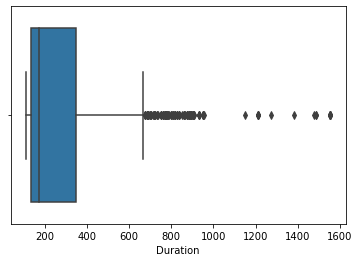

In [58]:
box = sn.boxplot(df['Duration']);

C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


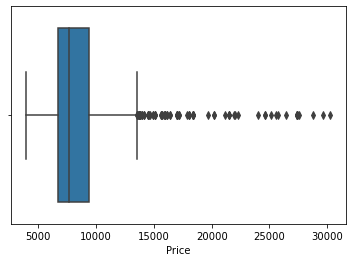

In [59]:
# this is our target variable
box = sn.boxplot(df['Price'])

In [60]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

      source  Duration  Date_year  Date_is_weekend     Price  No_of_stops  \
0        NaN  0.437374        NaN         0.735453  1.062981     0.684371   
1        NaN  0.460695        NaN         0.735453  1.062645     0.684371   
2        NaN  0.390734        NaN         0.735453  1.296636     0.684371   
3        NaN  0.414054        NaN         0.735453  1.061975     0.684371   
4        NaN  0.437374        NaN         0.735453  1.061975     0.684371   
...      ...       ...        ...              ...       ...          ...   
1898     NaN  0.367413        NaN         1.359707  0.657087     0.684371   
1899     NaN  0.274132        NaN         1.359707  0.657087     0.684371   
1900     NaN  0.122312        NaN         1.359707  0.674519     1.461195   
1901     NaN  0.297453        NaN         1.359707  0.798889     0.684371   
1902     NaN  0.344093        NaN         1.359707  5.421717     0.684371   

      Destination_Chennai  Destination_Hyderabad  Destination_Kochi  \
0   

In [61]:
# to many columns so we cant remove them here we use capping method on this
threshold = 3
print(np.where(z > 3))

(array([  49,   84,   85,   99,  125,  158,  163,  165,  183,  184,  185,
        186,  187,  188,  189,  190,  191,  192,  193,  194,  221,  222,
        287,  335,  336,  382,  399,  403,  411,  421,  423,  440,  441,
        460,  513,  517,  521,  531,  533,  537,  552,  566,  568,  575,
        577,  581,  604,  606,  615,  630,  633,  646,  647,  674,  700,
        708,  709,  710,  712,  729,  736,  743,  744,  745,  769,  772,
        775,  780,  781,  810,  811,  836,  838,  840,  842,  843,  922,
        923,  924,  925,  926,  999, 1000, 1001, 1127, 1392, 1420, 1463,
       1478, 1573, 1582, 1583, 1584, 1584, 1592, 1604, 1605, 1605, 1614,
       1614, 1615, 1615, 1616, 1616, 1617, 1617, 1618, 1618, 1618, 1620,
       1621, 1624, 1638, 1638, 1639, 1640, 1640, 1641, 1642, 1643, 1644,
       1645, 1648, 1649, 1650, 1651, 1652, 1652, 1653, 1653, 1654, 1654,
       1655, 1655, 1665, 1688, 1689, 1690, 1691, 1692, 1693, 1693, 1694,
       1694, 1695, 1695, 1702, 1703, 1704, 1705, 1

In [62]:

df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,source,Duration,Date_year,Date_is_weekend,Price,No_of_stops,Destination_Chennai,Destination_Hyderabad,Destination_Kochi,Destination_Kolkata,...,Date_month_no_10,Date_month_no_11,Date_month_no_12,Day_of_week_2,Day_of_week_4,Day_of_week_5,Day_of_week_6,Date_day_no_13,Date_day_no_14,Date_day_no_15
0,1.0,0.109325,1.0,0.0,0.172962,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.106109,1.0,0.0,0.172995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.115756,1.0,0.0,0.149929,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.112540,1.0,0.0,0.173061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.109325,1.0,0.0,0.173061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,1.0,0.118971,1.0,1.0,0.342520,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1899,1.0,0.131833,1.0,1.0,0.342520,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1900,1.0,0.186495,1.0,1.0,0.344238,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1901,1.0,0.128617,1.0,1.0,0.356498,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


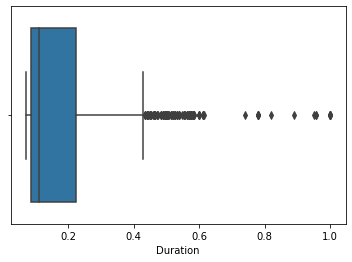

In [63]:
box = sn.boxplot(df_max_scaled['Duration']);

In [64]:
q3 = df["Price"].quantile(0.75)  
q1 = df["Price"].quantile(0.25)
print(q3)
print(q1)
IQR = q3 - q1
print(IQR)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)


9394.0
6659.0
2735.0
13496.5
2556.5


In [65]:
df["Price"] = np.where(df["Price"]> upper_limit, upper_limit,
                        np.where(df["Price"]< lower_limit, lower_limit,
                          df["Price"]))

<AxesSubplot:ylabel='Price'>

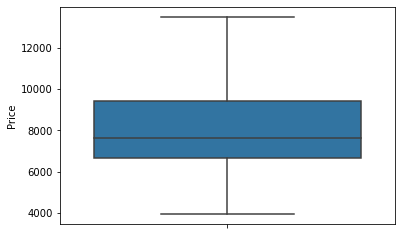

In [66]:
sn.boxplot( y="Price", data=df)

In [67]:
q3 = df["Duration"].quantile(0.75)  
q1 = df["Duration"].quantile(0.25)
print(q3)
print(q1)
IQR = q3 - q1
print(IQR)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)

df["Duration"] = np.where(df["Duration"]> upper_limit, upper_limit,
                        np.where(df["Duration"]< lower_limit, lower_limit,
                          df["Duration"]))


347.5
135.0
212.5
666.25
-183.75


<AxesSubplot:ylabel='Duration'>

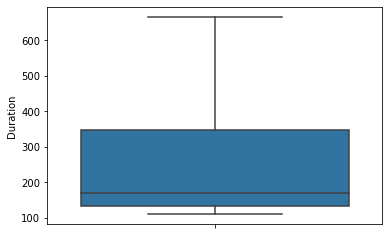

In [68]:
sn.boxplot( y="Duration", data=df)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source                 1903 non-null   int64  
 1   Duration               1903 non-null   float64
 2   Date_year              1903 non-null   int64  
 3   Date_is_weekend        1903 non-null   int32  
 4   Price                  1903 non-null   float64
 5   No_of_stops            1903 non-null   int64  
 6   Destination_Chennai    1903 non-null   uint8  
 7   Destination_Hyderabad  1903 non-null   uint8  
 8   Destination_Kochi      1903 non-null   uint8  
 9   Destination_Kolkata    1903 non-null   uint8  
 10  Destination_Mumbai     1903 non-null   uint8  
 11  Flight_0               1903 non-null   int64  
 12  Flight_1               1903 non-null   int64  
 13  Flight_2               1903 non-null   int64  
 14  Flight_3               1903 non-null   int64  
 15  Flig

<AxesSubplot:ylabel='source'>

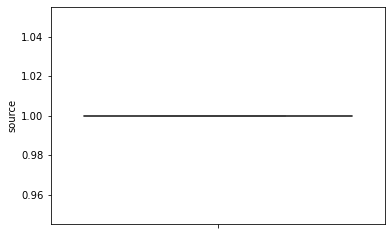

In [70]:
sn.boxplot( y="source", data=df)

<AxesSubplot:ylabel='Date_day_no_15'>

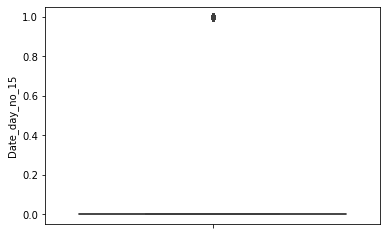

In [71]:
sn.boxplot( y="Date_day_no_15", data=df)

<AxesSubplot:ylabel='Date_day_no_14'>

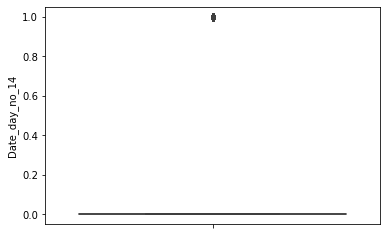

In [72]:
sn.boxplot( y="Date_day_no_14", data=df)

<AxesSubplot:ylabel='Date_day_no_13'>

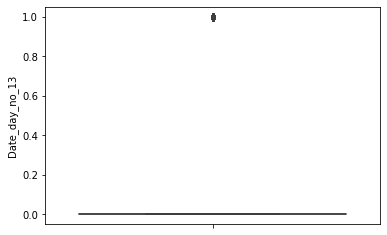

In [73]:
sn.boxplot( y="Date_day_no_13", data=df)

<AxesSubplot:ylabel='Day_of_week_6'>

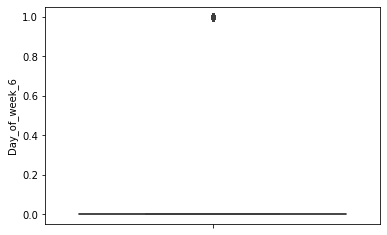

In [74]:
sn.boxplot( y="Day_of_week_6", data=df)

<AxesSubplot:ylabel='Day_of_week_5'>

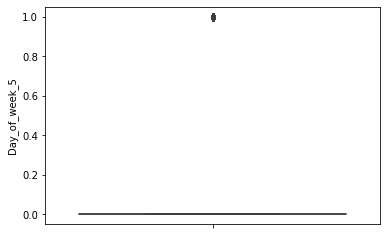

In [75]:
sn.boxplot( y="Day_of_week_5", data=df)

<AxesSubplot:ylabel='Day_of_week_4'>

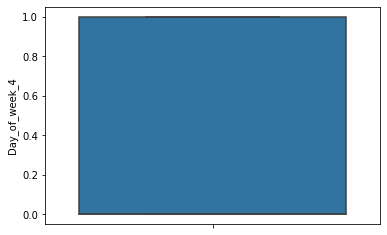

In [76]:
sn.boxplot( y="Day_of_week_4", data=df)

<AxesSubplot:ylabel='Day_of_week_2'>

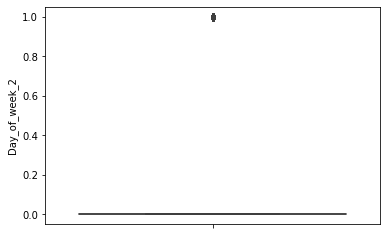

In [77]:
sn.boxplot( y="Day_of_week_2", data=df)

<AxesSubplot:ylabel='Date_month_no_12'>

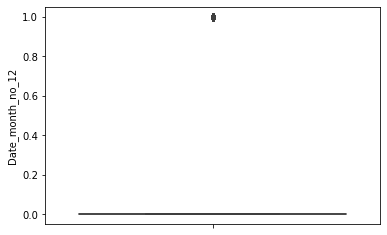

In [78]:
sn.boxplot( y="Date_month_no_12", data=df)

<AxesSubplot:ylabel='Date_month_no_11'>

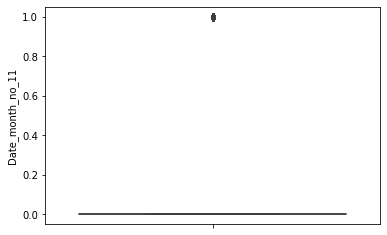

In [79]:
sn.boxplot( y="Date_month_no_11", data=df)

<AxesSubplot:ylabel='Date_month_no_10'>

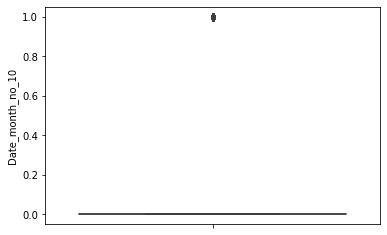

In [80]:
sn.boxplot( y="Date_month_no_10", data=df)

<AxesSubplot:ylabel='Date_month_no_9'>

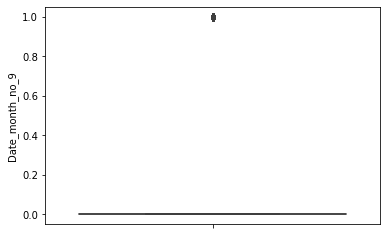

In [81]:
sn.boxplot( y="Date_month_no_9", data=df)

<AxesSubplot:ylabel='Date_month_no_8'>

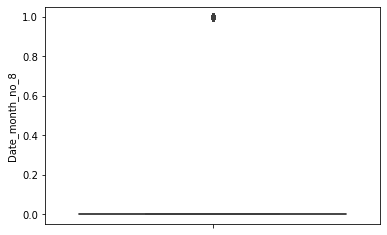

In [82]:
sn.boxplot( y="Date_month_no_8", data=df)

<AxesSubplot:ylabel='Flight_5'>

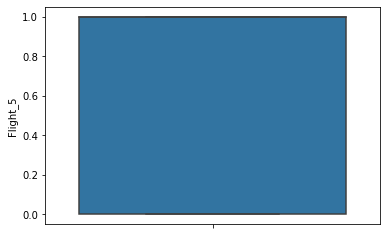

In [83]:
sn.boxplot( y="Flight_5", data=df)

<AxesSubplot:ylabel='Flight_4'>

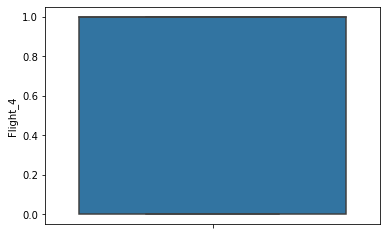

In [84]:
sn.boxplot( y="Flight_4", data=df)

<AxesSubplot:ylabel='Flight_3'>

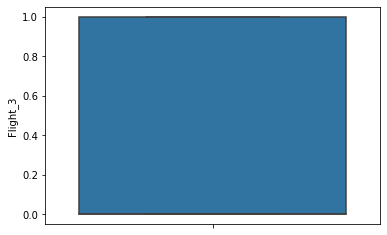

In [85]:
sn.boxplot( y="Flight_3", data=df)

<AxesSubplot:ylabel='Flight_2'>

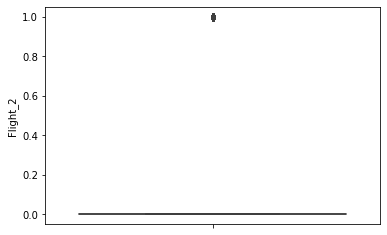

In [86]:
sn.boxplot( y="Flight_2", data=df)

<AxesSubplot:ylabel='Flight_1'>

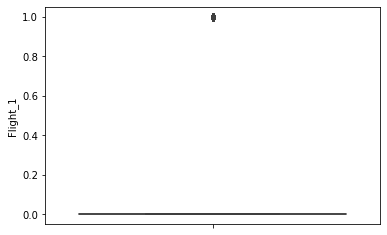

In [87]:
sn.boxplot( y="Flight_1", data=df)

<AxesSubplot:ylabel='Flight_0'>

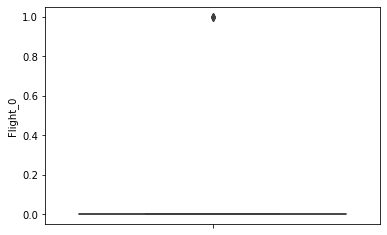

In [88]:
sn.boxplot( y="Flight_0", data=df)

<AxesSubplot:ylabel='Destination_Mumbai'>

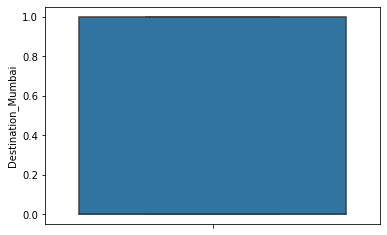

In [89]:
sn.boxplot( y="Destination_Mumbai", data=df)

<AxesSubplot:ylabel='Destination_Kolkata'>

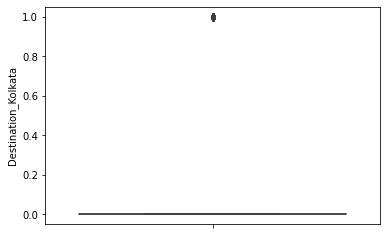

In [90]:
sn.boxplot( y="Destination_Kolkata", data=df)

<AxesSubplot:ylabel='Destination_Kochi'>

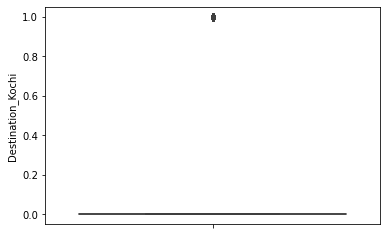

In [91]:
sn.boxplot( y="Destination_Kochi", data=df)

<AxesSubplot:ylabel='Destination_Hyderabad'>

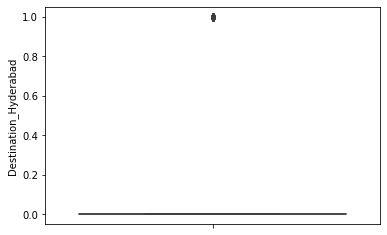

In [92]:
sn.boxplot( y="Destination_Hyderabad", data=df)

<AxesSubplot:ylabel='Destination_Chennai'>

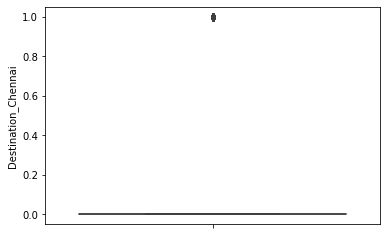

In [93]:
sn.boxplot( y="Destination_Chennai", data=df)

<AxesSubplot:ylabel='Date_is_weekend'>

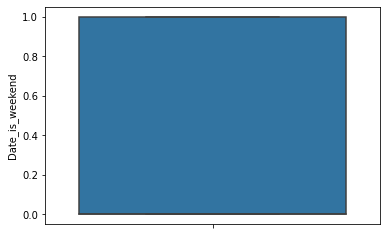

In [94]:
sn.boxplot( y="Date_is_weekend", data=df)

<AxesSubplot:ylabel='Date_year'>

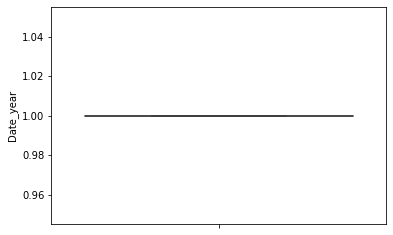

In [95]:
sn.boxplot( y="Date_year", data=df)

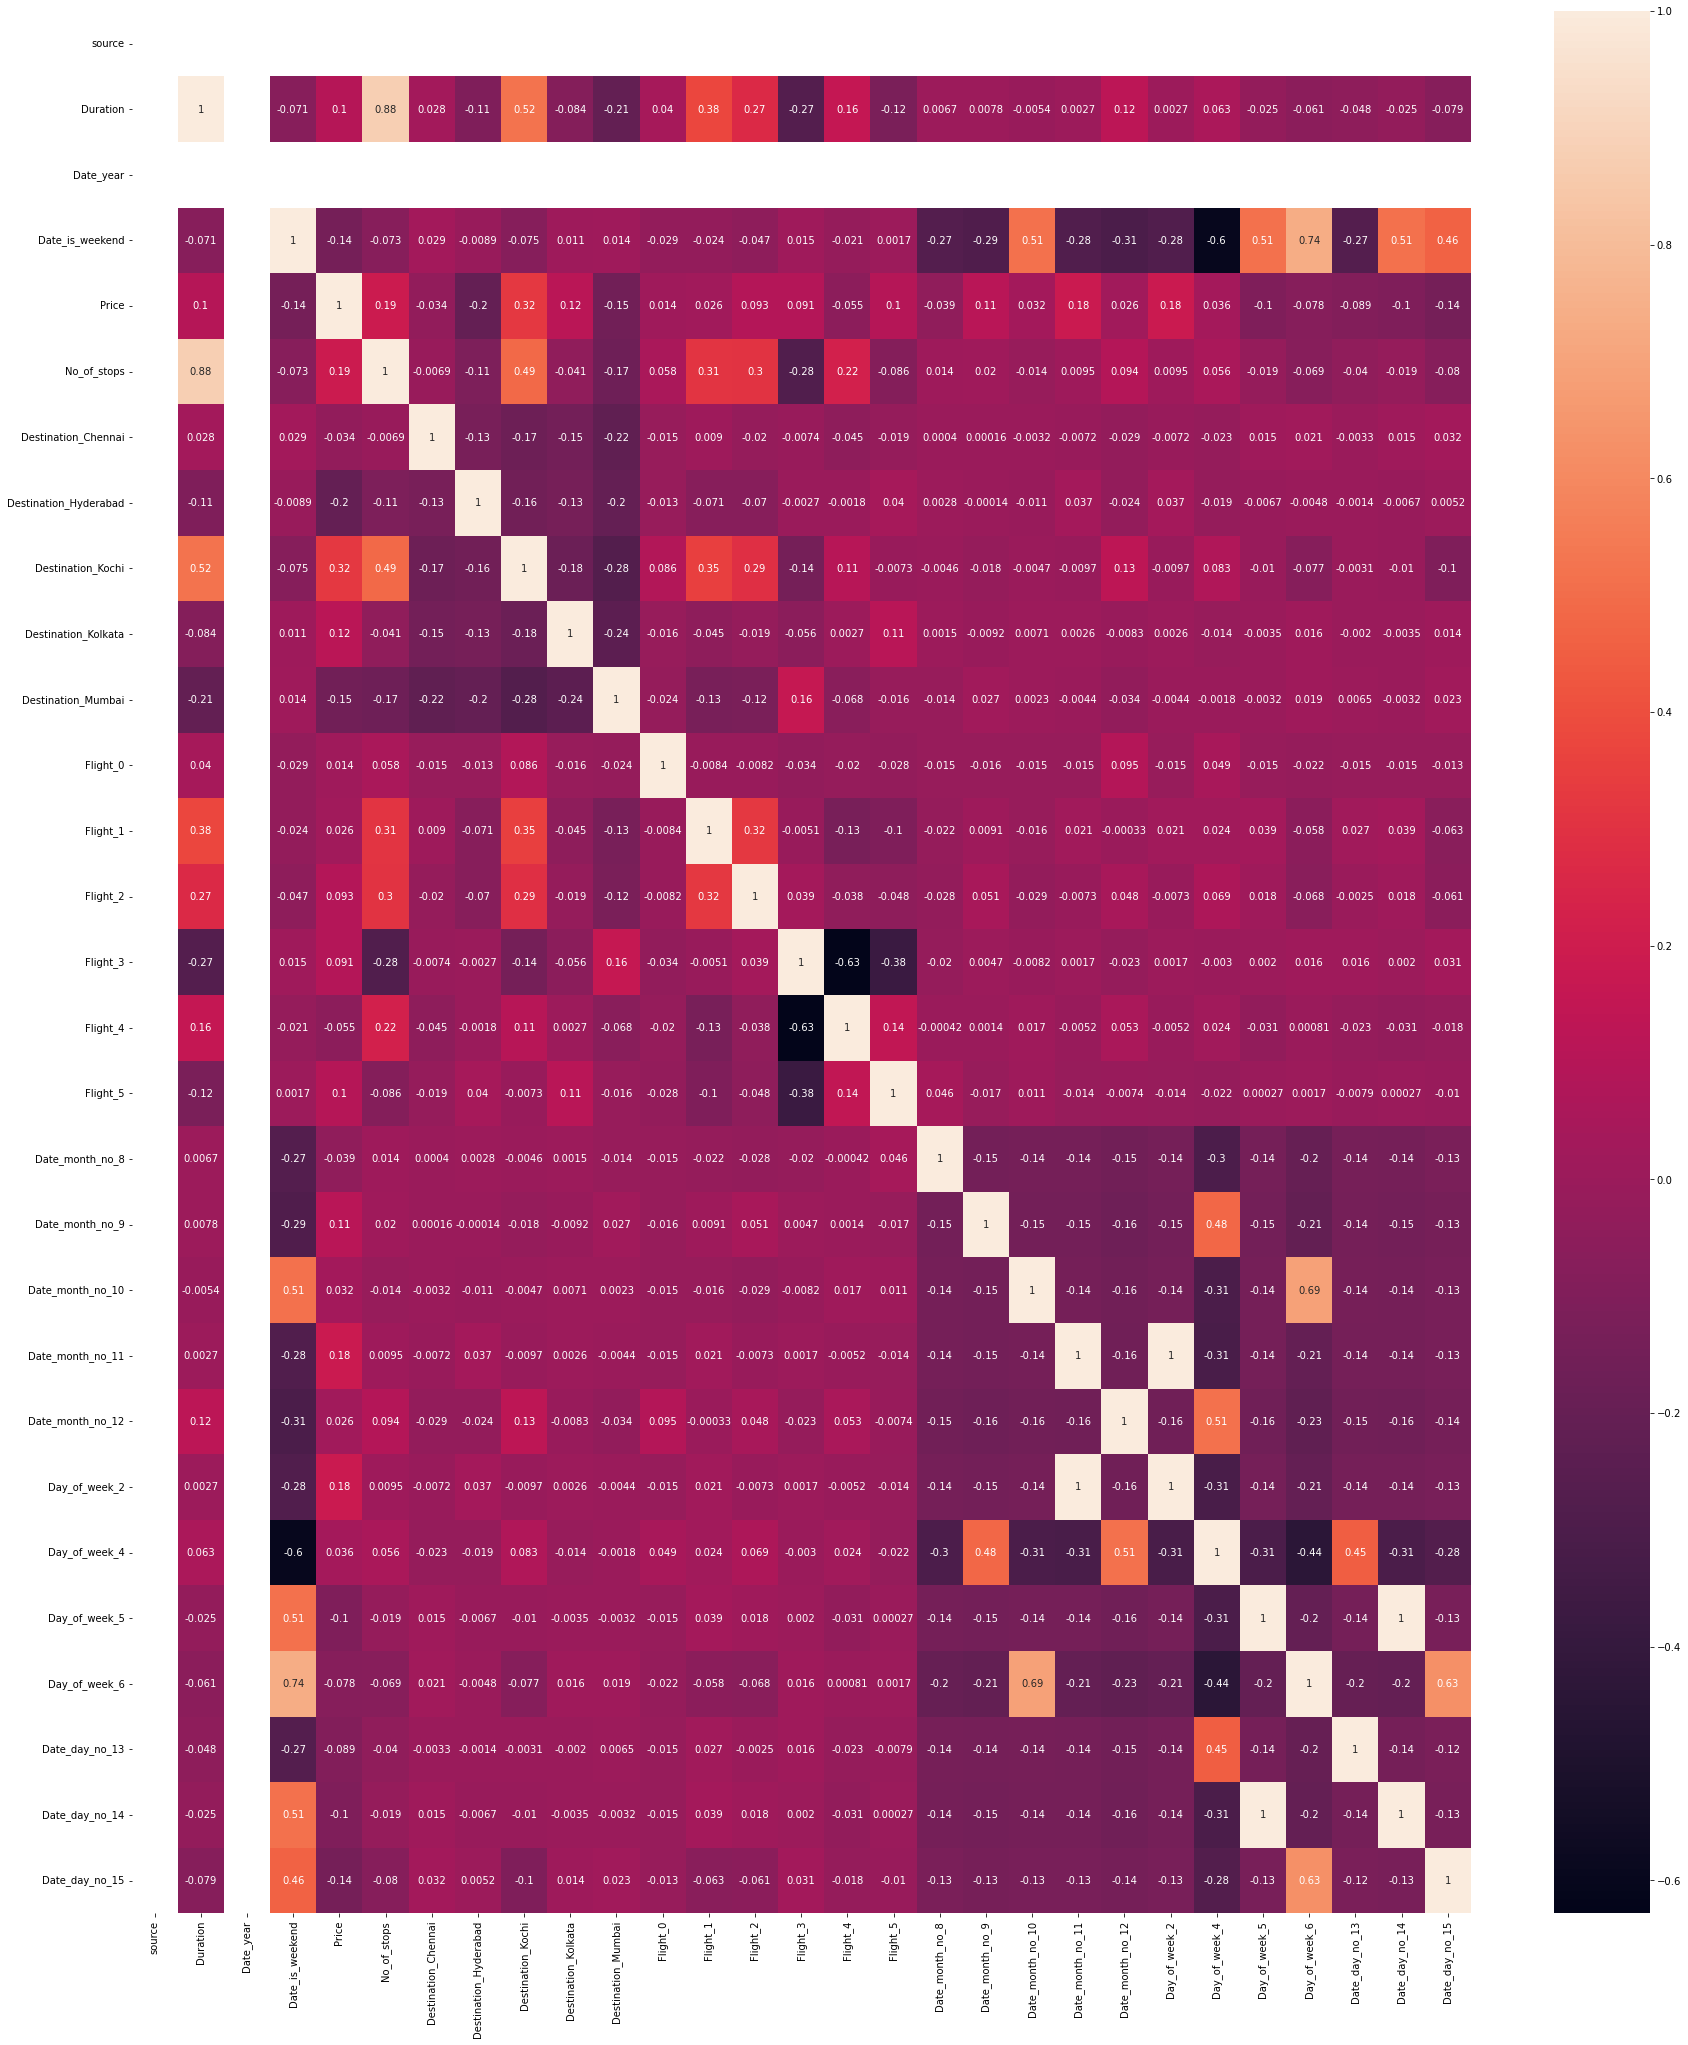

In [96]:
# ploting heatmap
df_corr = df.corr()
plt.figure(figsize = (30,35))
sn.heatmap(df_corr,annot =True)
plt.show()

In [97]:
del(df['Day_of_week_6'])
del(df['No_of_stops'])
del(df['Day_of_week_5'])
del(df['Date_month_no_11'])

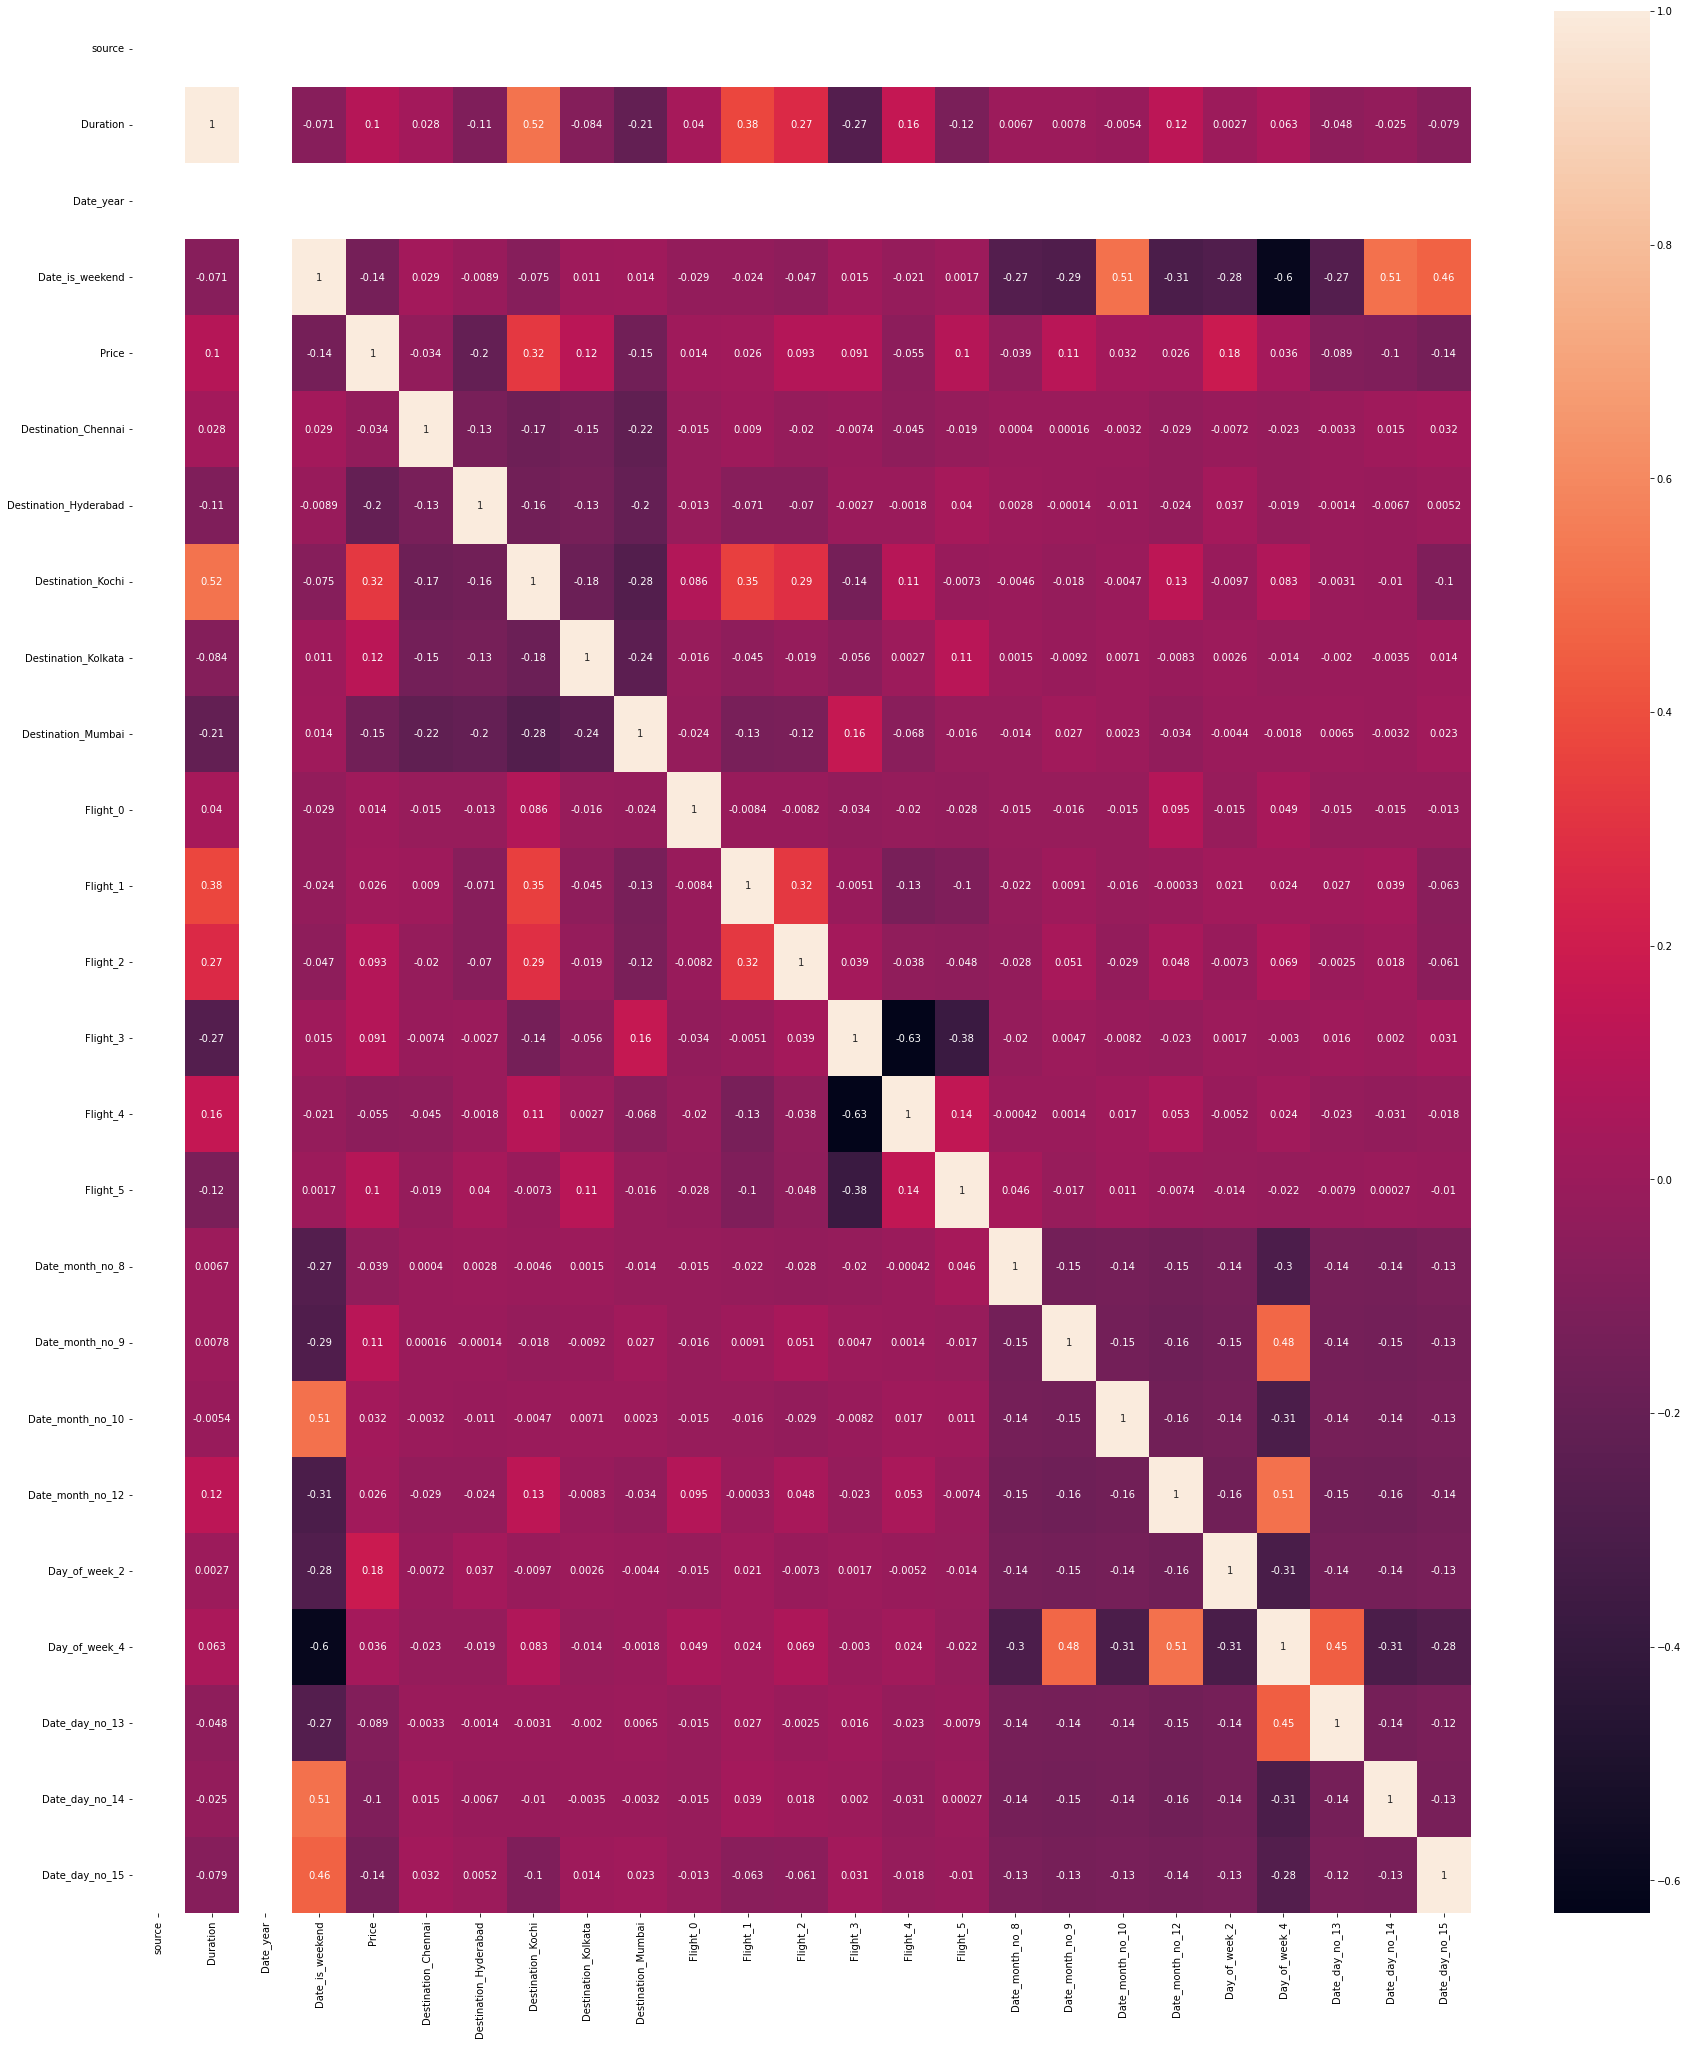

In [98]:
# ploting heatmap
df_corr = df.corr()
plt.figure(figsize = (30,35))
sn.heatmap(df_corr,annot =True)
plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   source                 1903 non-null   int64  
 1   Duration               1903 non-null   float64
 2   Date_year              1903 non-null   int64  
 3   Date_is_weekend        1903 non-null   int32  
 4   Price                  1903 non-null   float64
 5   Destination_Chennai    1903 non-null   uint8  
 6   Destination_Hyderabad  1903 non-null   uint8  
 7   Destination_Kochi      1903 non-null   uint8  
 8   Destination_Kolkata    1903 non-null   uint8  
 9   Destination_Mumbai     1903 non-null   uint8  
 10  Flight_0               1903 non-null   int64  
 11  Flight_1               1903 non-null   int64  
 12  Flight_2               1903 non-null   int64  
 13  Flight_3               1903 non-null   int64  
 14  Flight_4               1903 non-null   int64  
 15  Flig

In [103]:
# now lets standardize the data and use train test split 
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
x = df[['Date_day_no_15','Date_day_no_14','Date_day_no_13','Day_of_week_4','Day_of_week_2','Date_month_no_12',
       'Date_month_no_10','Date_month_no_9','Date_month_no_8','Flight_5','Flight_4','Flight_3','Flight_2','Flight_1',
       'Flight_0','Destination_Mumbai','Destination_Kolkata','Destination_Kochi','Destination_Hyderabad',
       'Destination_Chennai','Date_is_weekend','Date_year','Duration','source']]
y = df['Price']
# standardization 
scale = object.fit_transform(x) 
print(scale)


[[-0.33885295 -0.37716959 -0.36802381 ...  0.         -0.479028
   0.        ]
 [-0.33885295 -0.37716959 -0.36802381 ...  0.         -0.50917742
   0.        ]
 [-0.33885295 -0.37716959 -0.36802381 ...  0.         -0.41872916
   0.        ]
 ...
 [ 2.95113261 -0.37716959 -0.36802381 ...  0.          0.24455805
   0.        ]
 [ 2.95113261 -0.37716959 -0.36802381 ...  0.         -0.29813149
   0.        ]
 [ 2.95113261 -0.37716959 -0.36802381 ...  0.         -0.35843033
   0.        ]]


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [105]:
x_train,x_test,y_train,y_test = train_test_split(scale,y,test_size = 0.25,random_state =348)
y_train.head()

849      8159.0
702     10040.0
1445     8054.0
263      6416.0
1779    10364.0
Name: Price, dtype: float64

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [110]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

In [114]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.24 %.
